# Caipora Project


__Objecitve__

Explore data generated by _data_preparation.ipynb_.

 
__Data Source__

__${WORKDIR}__/data/ouptut/hotspot_spi.csv


In [1]:
import os
import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Constants

In [2]:
WORKDIR = os.path.abspath(os.getcwd())

## Get the data

__Load into Pandas DataFrame__

In [3]:
file = ''.join([WORKDIR, "/data/output/hotspot_spi.csv"]) 
dataset = pd.read_csv(file)

dataset.head()

,ano,estado,municipio,diasemchuva,precipitacao,riscofogo,frp,fococalor,IPS Amazônia,Ranking IPS,...,Moradia,Segurança pessoal,Acesso ao conhecimento básico,Acesso à informação e comunicação,Saúde e bem-estar,Qualidade do meio ambiente,Direitos individuais,Liberdade individual e de escolha,Tolerância e inclusão,Acesso à educação superior
0,2014,ACRE,ACRELANDIA,0.9,0.38,0.23,0.0,441,54.64,357,...,76.60,44.61,69.92,12.54,89.82,56.05,21.91,60.38,88.16,8.63
1,2014,ACRE,ASSIS BRASIL,1.7,0.46,0.15,0.0,327,53.48,446,...,55.45,56.35,50.45,18.74,75.53,91.41,21.59,62.80,68.29,5.22
2,2014,ACRE,BRASILEIA,1.4,0.36,0.19,0.0,1120,50.05,692,...,71.35,39.08,79.48,23.60,80.69,74.71,17.70,62.01,0.00,6.95
3,2014,ACRE,BUJARI,0.8,0.36,0.12,0.0,339,54.02,405,...,68.66,70.37,54.28,9.62,79.25,63.17,19.18,54.60,86.42,9.37
4,2014,ACRE,CAPIXABA,0.8,0.10,0.08,0.0,455,53.15,479,...,72.30,47.44,55.57,13.55,81.29,57.89,18.46,60.37,100.00,7.76


## Visualize the data

### Get top ten cities risk fire

In [4]:
def range_years(dataset, inclusive=False):
    idx = 1 if inclusive else 0
    return range(dataset["ano"].min(), dataset["ano"].max() + idx, 1)


def get_top_five_hotspot(dataset): 
    gb_cities = dataset.groupby(by=["municipio"])
    top_five_hotspot = gb_cities['fococalor'].sum().sort_values(ascending=False)[:5]
    return top_five_hotspot


def get_top_hotspot(dataset, head=10, ascending=True): 
    gb_cities = dataset.groupby(by=["municipio"])
    top_ten_hotspot = gb_cities['fococalor'].sum().sort_values(ascending=ascending)[:head]
    return top_ten_hotspot


def get_max_hotspot(dataset, year):
    max_hotspot = dataset[(dataset["ano"] == year)]["fococalor"].max()
    return dataset[(dataset["ano"] == year) & (dataset["fococalor"] == max_hotspot)]


def get_min_hotspot(dataset, year):
    min_hotspot = dataset[(dataset["ano"] == year)]["fococalor"].min()
    return dataset[(dataset["ano"] == year) & (dataset["fococalor"] == min_hotspot)]


def plot_top_hotspot(dataset, ascending=True):
    cols = 3
    years = [2014, 2018, 2021]
    rows = math.ceil(len(years) / cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=(25, 5), constrained_layout=True)

    title = "Cities with {} hotspots per year".format("Fewer" if ascending else "Biggest")
    fig.suptitle(title, fontsize="xx-large", fontweight='heavy')

    for idx, ax in enumerate(axes):
        year = years[idx]
        yeardf = dataset[(dataset["ano"] == year)]      
        tt = get_top_hotspot(yeardf, ascending=ascending)

        ax.set_title(year, fontdict={'fontsize': 16})
        ax.set_xlabel(" ")
        ax.set_ylabel(" ")
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)

        sns.histplot(data=tt, y=tt.index, weights=tt.values, ax=ax)

#### List of minors hotspot cities

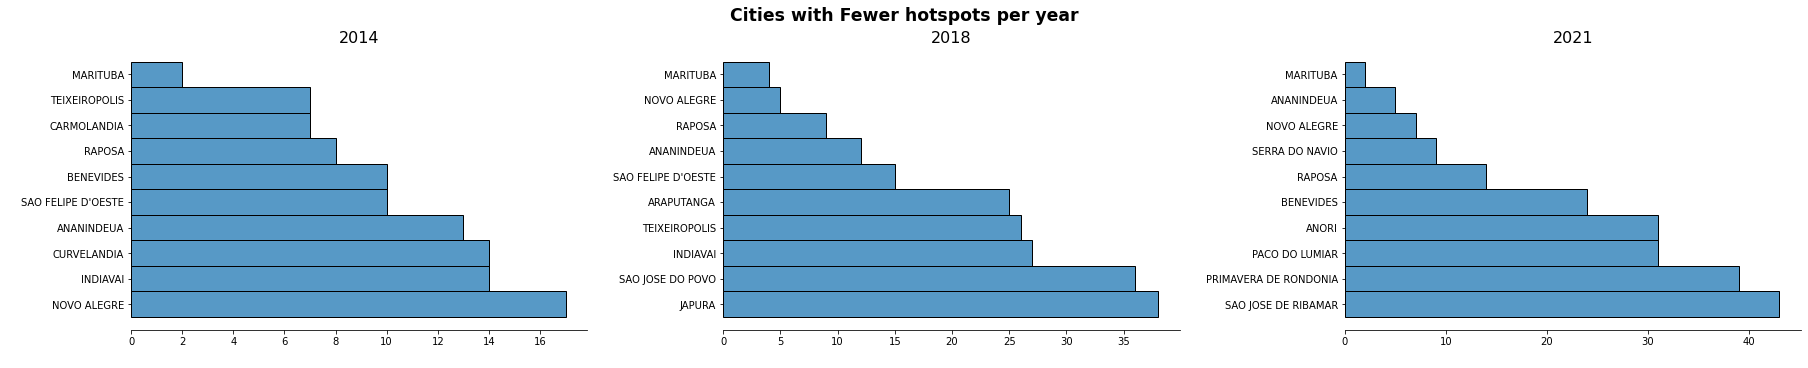

In [5]:
plot_top_hotspot(dataset, ascending=True)

#### List of maijors hotspot cities

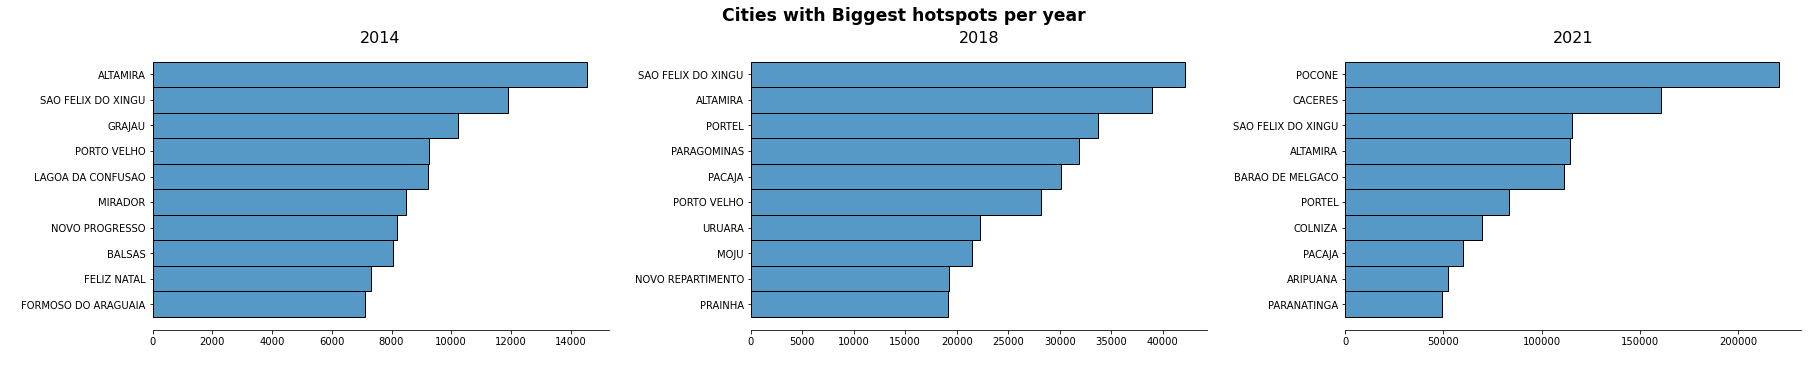

In [6]:
plot_top_hotspot(dataset, ascending=False)

In [19]:
 dataset[dataset["IPS Amazônia"] > 65.00]

,ano,estado,municipio,diasemchuva,precipitacao,riscofogo,frp,fococalor,IPS Amazônia,Ranking IPS,...,Moradia,Segurança pessoal,Acesso ao conhecimento básico,Acesso à informação e comunicação,Saúde e bem-estar,Qualidade do meio ambiente,Direitos individuais,Liberdade individual e de escolha,Tolerância e inclusão,Acesso à educação superior
297,2014,MATO GROSSO,BARRA DO GARCAS,8.4,0.21,0.45,0.00,2456,66.27,3,...,87.07,47.37,78.42,61.93,75.13,74.12,21.56,74.76,79.65,37.33
318,2014,MATO GROSSO,CUIABA,0.8,0.25,0.11,0.00,630,71.71,1,...,92.36,29.16,81.41,87.25,74.15,71.99,25.38,77.69,66.54,77.49
406,2014,MATO GROSSO,SAPEZAL,2.3,0.19,0.19,0.00,1414,65.39,4,...,89.57,36.44,77.28,38.03,89.67,79.28,29.25,69.32,100.00,24.48
721,2014,TOCANTINS,PALMAS,2.4,0.10,0.21,0.00,992,67.97,2,...,90.14,36.04,81.36,65.26,86.88,72.14,29.82,80.68,0.00,98.60
1090,2018,MATO GROSSO,CUIABA,9.8,0.91,0.84,1.76,1379,71.98,1,...,98.85,32.50,80.66,75.11,69.88,71.80,29.37,80.27,63.79,84.56
1103,2018,MATO GROSSO,IPIRANGA DO NORTE,8.3,2.42,0.58,1.59,511,65.34,5,...,97.37,89.00,85.62,19.03,89.00,58.31,30.79,72.91,98.83,19.30
1155,2018,MATO GROSSO,PRIMAVERA DO LESTE,10.8,0.63,0.86,3.80,767,65.44,4,...,99.30,25.45,80.71,46.04,78.16,70.55,28.61,83.48,82.77,35.05
1178,2018,MATO GROSSO,SAPEZAL,9.6,0.83,0.77,0.64,1153,67.10,3,...,97.82,39.44,77.09,31.42,90.04,79.81,36.78,71.78,100.00,26.90
1183,2018,MATO GROSSO,TANGARA DA SERRA,11.0,0.79,0.78,2.76,2664,65.02,6,...,97.77,45.18,86.33,31.72,80.14,80.92,19.47,85.23,80.78,18.14
1493,2018,TOCANTINS,PALMAS,10.2,0.67,0.82,1.35,1055,68.45,2,...,97.98,31.32,85.59,58.41,84.24,72.24,34.63,84.28,0.00,98.64


In [8]:
high_riskfire = dataset[(dataset["riscofogo"] > 0.6)]
high_riskfire

,ano,estado,municipio,diasemchuva,precipitacao,riscofogo,frp,fococalor,IPS Amazônia,Ranking IPS,...,Moradia,Segurança pessoal,Acesso ao conhecimento básico,Acesso à informação e comunicação,Saúde e bem-estar,Qualidade do meio ambiente,Direitos individuais,Liberdade individual e de escolha,Tolerância e inclusão,Acesso à educação superior
291,2014,MATO GROSSO,ARAGUAINHA,12.4,2.79,0.76,0.00,78,62.00,24,...,93.06,94.75,73.97,19.27,51.02,87.65,23.24,46.13,100.00,38.18
376,2014,MATO GROSSO,PONTE BRANCA,7.8,0.05,0.82,0.00,147,57.37,156,...,91.11,100.00,84.26,17.04,57.24,69.71,25.63,57.03,60.88,7.51
597,2014,RONDONIA,NOVO HORIZONTE DO OESTE,5.7,1.86,0.77,0.00,36,53.83,420,...,67.12,71.37,76.19,9.53,78.37,51.89,26.19,67.14,80.55,7.30
714,2014,TOCANTINS,NAZARE,5.3,0.15,0.61,0.00,99,56.30,220,...,71.80,91.69,65.24,12.97,57.71,55.23,23.40,59.92,94.54,6.78
772,2018,ACRE,ACRELANDIA,4.2,1.35,0.72,2.93,887,52.38,555,...,86.09,34.06,66.89,12.70,76.06,54.12,27.52,64.41,65.09,8.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,2021,TOCANTINS,TOCANTINOPOLIS,23.2,0.32,0.85,9.03,799,53.76,441,...,88.02,53.41,61.92,21.05,77.33,81.74,52.61,55.15,8.02,11.19
2312,2021,TOCANTINS,TUPIRAMA,39.5,0.94,0.81,7.53,180,53.14,486,...,90.28,49.77,87.32,20.03,49.07,68.11,20.60,52.21,57.06,14.56
2313,2021,TOCANTINS,TUPIRATINS,43.5,0.41,0.89,9.99,690,60.37,63,...,83.47,97.42,68.42,9.51,77.47,67.89,16.74,52.59,83.34,15.03
2314,2021,TOCANTINS,WANDERLANDIA,17.7,0.42,0.80,4.85,622,54.31,390,...,91.31,40.68,77.03,10.92,76.64,65.18,17.35,48.18,90.87,11.75


In [9]:
# sns.set_theme(style="ticks")
# sns.pairplot(high_riskfire)

In [10]:
def plot_indicators(dataset, indicators, labels):
    for idx, ind in enumerate(indicators):       
        plt.scatter(dataset.ano, ind, label=labels[idx], s=100, ec="white", zorder=2)
        plt.plot(dataset.ano, ind)
        plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
        
    plt.show()

In [11]:
altamira = dataset[dataset.municipio == "ALTAMIRA"]

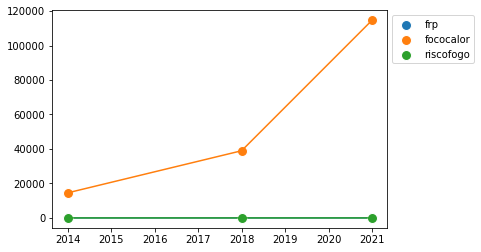

In [12]:
labels = [
    "frp",
    "fococalor",
    "riscofogo"
]

indicators = [
    altamira[labels[0]], 
    altamira[labels[1]], 
    altamira[labels[2]], 
]

plot_indicators(altamira, indicators, labels)

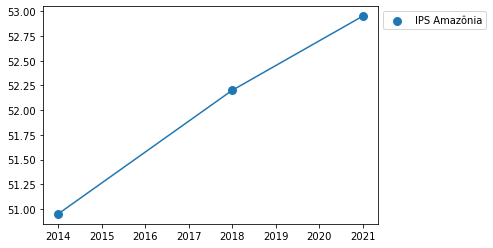

In [13]:
labels = [
    "IPS Amazônia"
]

indicators = [
    altamira[labels[0]], 
]

plot_indicators(altamira, indicators, labels)

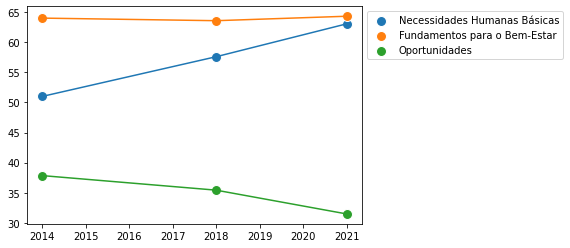

In [14]:
labels = [
    "Necessidades Humanas Básicas", 
    "Fundamentos para o Bem-Estar",
    "Oportunidades"
]

indicators = [
    altamira[labels[0]], 
    altamira[labels[1]],
    altamira[labels[2]]
]

plot_indicators(altamira, indicators, labels)

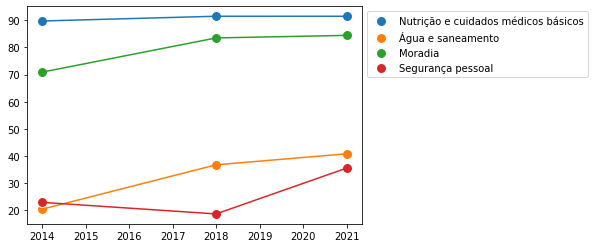

In [15]:
labels = [
    "Nutrição e cuidados médicos básicos", 
    "Água e saneamento",
    "Moradia",
    "Segurança pessoal"
]

indicators = [
    altamira[labels[0]], 
    altamira[labels[1]],
    altamira[labels[2]],
    altamira[labels[3]]
]

plot_indicators(altamira, indicators, labels)

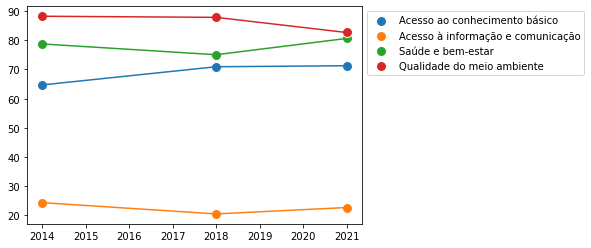

In [16]:
labels = [
    "Acesso ao conhecimento básico", 
    "Acesso à informação e comunicação",
    "Saúde e bem-estar",
    "Qualidade do meio ambiente"
]

indicators = [
    altamira[labels[0]], 
    altamira[labels[1]],
    altamira[labels[2]],
    altamira[labels[3]]
]

plot_indicators(altamira, indicators, labels)

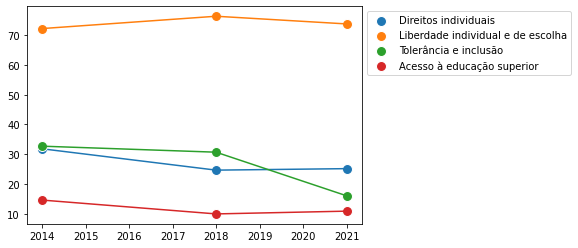

In [17]:
labels = [
    "Direitos individuais", 
    "Liberdade individual e de escolha",
    "Tolerância e inclusão",
    "Acesso à educação superior"
]

indicators = [
    altamira[labels[0]], 
    altamira[labels[1]],
    altamira[labels[2]],
    altamira[labels[3]]
]

plot_indicators(altamira, indicators, labels)